# <center> Disney Studio Income Analysis

## Import Libraries

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross

In [162]:
df=pd.read_csv("/content/disney_movies.csv")

In [163]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [164]:
df.tail()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936


In [165]:
df.shape

(579, 6)

In [166]:
df.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [168]:
#Checking Null Values
df.isnull().sum() 

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [169]:
#Removing Null values
df.fillna('',inplace=True)

In [170]:
df.isnull().sum() 

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [171]:
# release_date into datatime
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     579 non-null    object        
 3   mpaa_rating               579 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


In [172]:
#Best Gross
df.sort_values('total_gross',ascending=False).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225


In [173]:
#Worst Gross
df.sort_values('total_gross',ascending=True).head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
27,Amy,1981-03-20,Drama,,0,0


In [174]:
#best & worst total gross
df.sort_values('total_gross',ascending=False)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
524,The Avengers,2012-05-04,Action,PG-13,623279547,660081224
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459005868
...,...,...,...,...,...,...
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984
20,The Many Adventures of Winnie the Pooh,1977-03-11,,,0,0
29,Condorman,1981-08-07,Action,,0,0
355,Frank McKlusky C.I.,2002-01-01,,,0,0


## Task 2: Visualize Year Distribution Plot

In [175]:
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [176]:
fig1=px.histogram(df,x='year',color='year')
fig1.show()

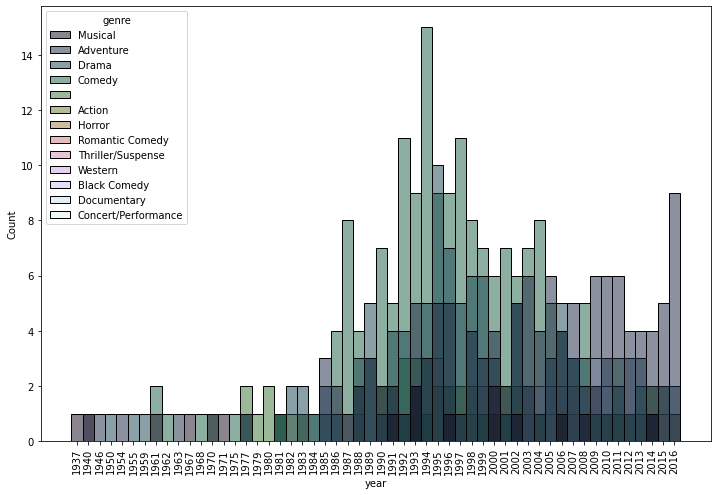

In [177]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.histplot(x='year',hue='genre',data=df,palette='cubehelix')
plt.show()

## Task 3: Does Movies Income Decreased or Increased?

Yes ,Movies income increased.We can visualize it by lineplot.

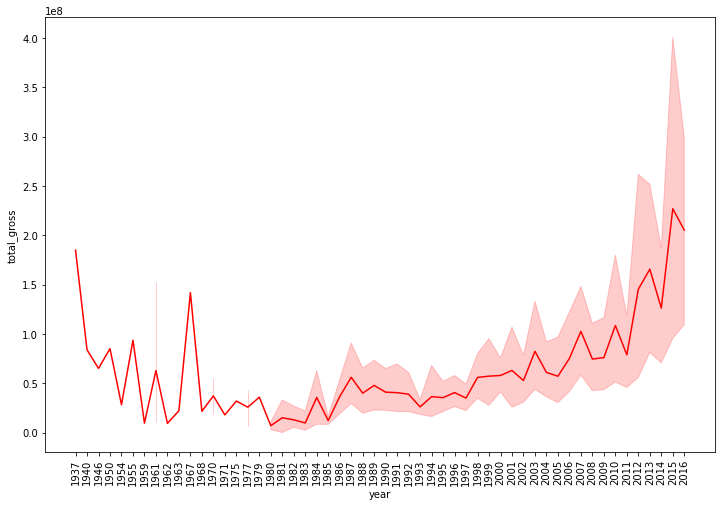

In [184]:
plt.figure(figsize=(12,8))
sns.lineplot(x='year',y='total_gross',data=df,color='red')
plt.xticks(rotation=90)
plt.show()

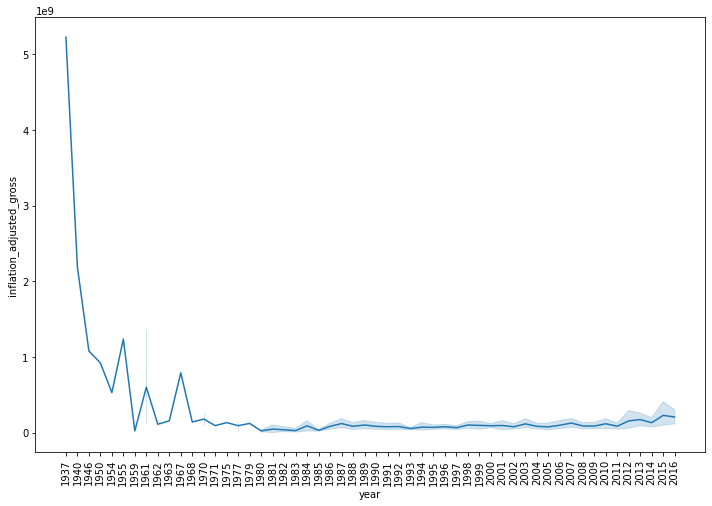

In [179]:
plt.figure(figsize=(12,8))
sns.lineplot(x='year',y='inflation_adjusted_gross',data=df)
plt.xticks(rotation=90)
plt.show()

## Task 4: Describe the total counts of Genres

In [180]:
df['genre'].value_counts()

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
                        17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

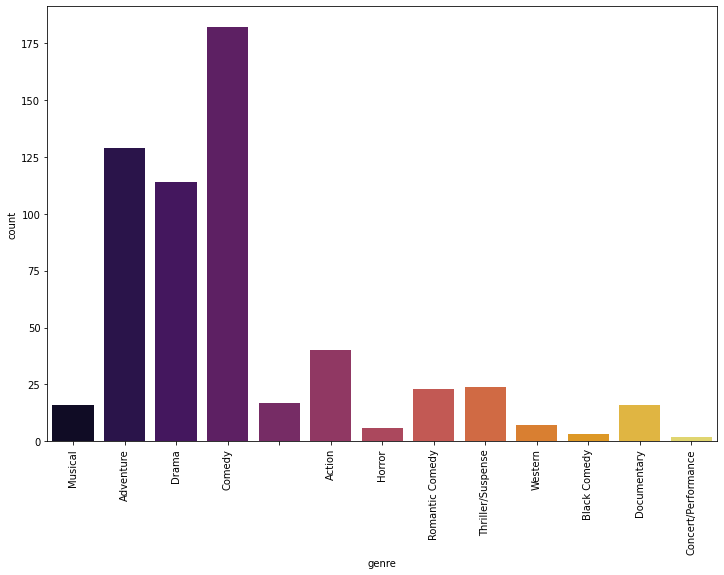

In [181]:
plt.figure(figsize=(12,8))
sns.countplot(x='genre',data=df,palette='inferno')
plt.xticks(rotation=90)
plt.show()

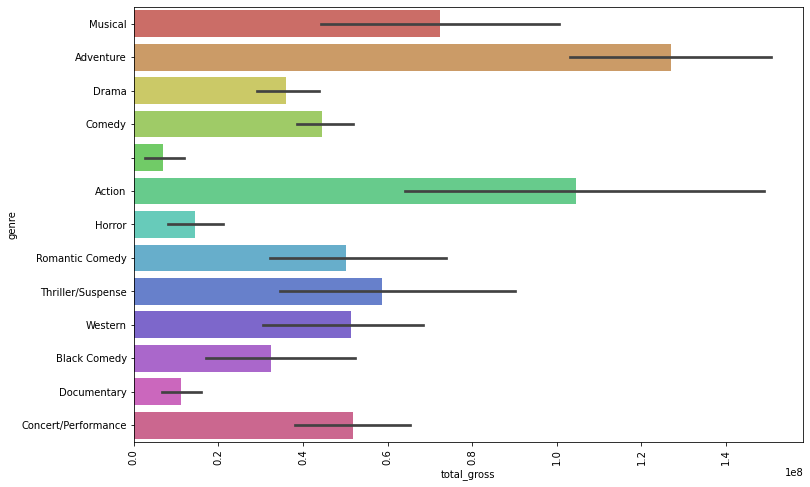

In [182]:
plt.figure(figsize=(12,8))
sns.barplot(y='genre',x='total_gross',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

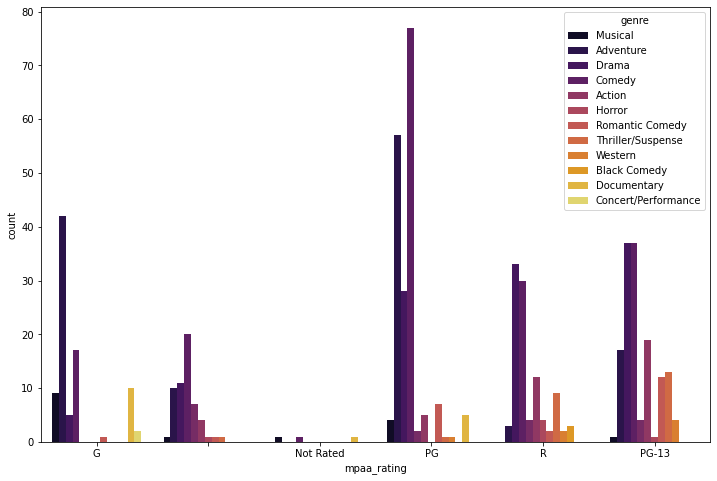

In [183]:
plt.figure(figsize=(12,8))
sns.countplot(x='mpaa_rating',hue='genre',data=df,palette='inferno')
plt.show()